<a href="https://colab.research.google.com/github/cervantes-loves-ai/pytorch-for-deep-learning/blob/master/deep_neaural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
  n_pts = 500
  X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
  
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape(500, 1))
  print(y.shape)

(500,)


In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

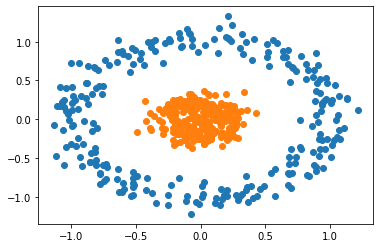

In [0]:
scatter_plot()

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, H1)
      self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
      x = torch.sigmoid(self.linear(x))
      x = torch.sigmoid(self.linear2(x))
      return x
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [0]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.03219418600201607
epoch: 1 loss: 0.030535537749528885
epoch: 2 loss: 0.029004238545894623
epoch: 3 loss: 0.027608321979641914
epoch: 4 loss: 0.02624848112463951
epoch: 5 loss: 0.024970542639493942
epoch: 6 loss: 0.0237661711871624
epoch: 7 loss: 0.02260502427816391
epoch: 8 loss: 0.021522527560591698
epoch: 9 loss: 0.020521605387330055
epoch: 10 loss: 0.01957591623067856
epoch: 11 loss: 0.01868094876408577
epoch: 12 loss: 0.017843440175056458
epoch: 13 loss: 0.017055237665772438
epoch: 14 loss: 0.016307087615132332
epoch: 15 loss: 0.01560275536030531
epoch: 16 loss: 0.014944714494049549
epoch: 17 loss: 0.014326524920761585
epoch: 18 loss: 0.013742816634476185
epoch: 19 loss: 0.013193639926612377
epoch: 20 loss: 0.012678024359047413
epoch: 21 loss: 0.012191250920295715
epoch: 22 loss: 0.011729706078767776
epoch: 23 loss: 0.011293449439108372
epoch: 24 loss: 0.0108829066157341
epoch: 25 loss: 0.010496187023818493
epoch: 26 loss: 0.010130534879863262
epoch: 27 loss: 0.009

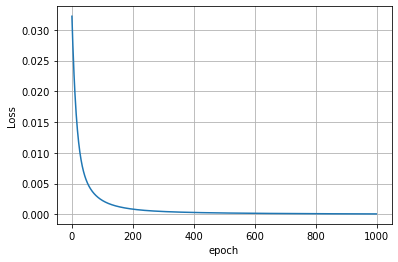

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

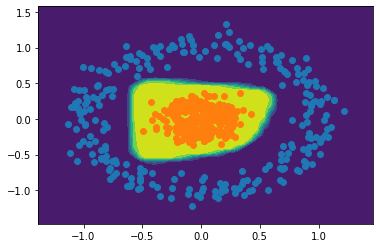

In [0]:
plot_decision_boundary(X,y)
scatter_plot()

Prediction is 1


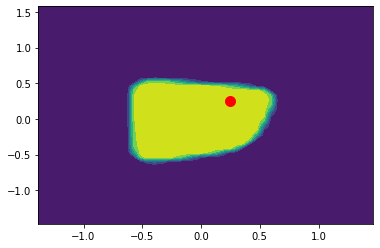

In [0]:
x = 0.25
y = 0.25
point = torch.Tensor ([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is" , prediction)
plot_decision_boundary(X,y)

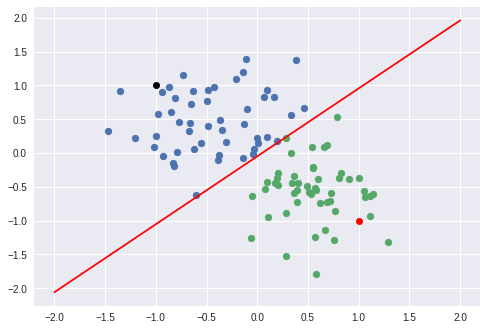

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point belongs in class 1
Black point belongs in class = 0


In [0]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2))) 